# Основные концепции Machine Learning. Домашняя работа

In [56]:
### Тут нужно сделать импорты всех необходимых библиотек ###

In [57]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [58]:
### Здесь требуется загрузить датасет phones.csv ###
phone=pd.read_csv('1.8_phones.csv')

In [59]:
phone.head


<bound method NDFrame.head of     disk       os  price  year
0     64  Android   7256  2016
1    128  Android   7623  2015
2     64  Android   1916  2010
3    512      iOS  15045  2017
4     16  Android   4478  2013
..   ...      ...    ...   ...
95   512      iOS   8398  2011
96    64  Android   7197  2016
97    32  Android   5694  2014
98    32  Android   7589  2016
99   256      iOS   9533  2014

[100 rows x 4 columns]>

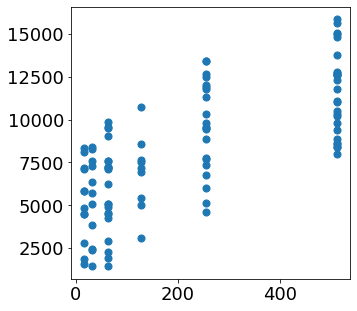

In [60]:
### Опционально: используя matplotlib, можно сделать визуализацию загруженного датасета ###
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
ax.scatter(phone['disk'],phone['price'], s=50)
plt.show()

Задание 1: обучить модель регрессии

In [61]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X=phone[['disk']]
y=phone['price']



In [62]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###
reg=LinearRegression().fit(X,y)
reg.predict(X[0:1])[0]

6120.265447090668

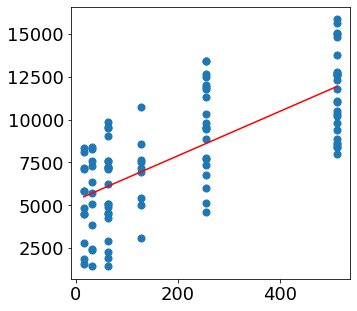

In [63]:
fig = plt.figure(figsize=(5,5))
ax=plt.axes()
ax.scatter(phone['disk'],phone['price'],s=50)
ax.plot([X.disk.min(),X.disk.max()],[reg.predict(X[:]).min(),reg.predict(X[:]).max()],c='red')
plt.show()

Задание 2: обучить модель классификации

In [64]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phone[['price','year']]
y = phone['os']

In [65]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###
cl=DecisionTreeClassifier().fit(X,y)
print(export_text(cl))

|--- feature_0 <= 7660.50
|   |--- feature_1 <= 2012.50
|   |   |--- feature_0 <= 3855.50
|   |   |   |--- class: Android
|   |   |--- feature_0 >  3855.50
|   |   |   |--- class: iOS
|   |--- feature_1 >  2012.50
|   |   |--- class: Android
|--- feature_0 >  7660.50
|   |--- feature_1 <= 2015.50
|   |   |--- class: iOS
|   |--- feature_1 >  2015.50
|   |   |--- feature_0 <= 11017.00
|   |   |   |--- class: Android
|   |   |--- feature_0 >  11017.00
|   |   |   |--- class: iOS



In [66]:
cl.predict(X[8:9])[0],y[8]


('iOS', 'iOS')

Задание 3: обучить модель кластеризации

In [67]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phone[['disk','price']]

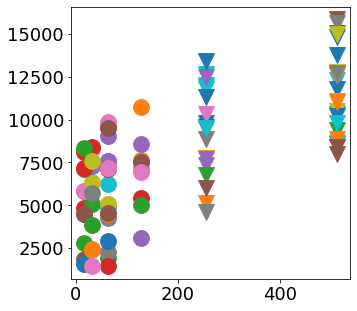

In [68]:
matplotlib.rc('font',size=18)
fig=plt.figure(figsize=(5,5))
markers={'Android':'o','iOS':'v'}
for disk,price,os in zip(phone.disk,phone.price,phone.os):
    plt.scatter(disk,price,s=250,marker=markers[os])
plt.show()
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

In [70]:
clust=KMeans(n_clusters=2).fit(X)

[c1,c2]=clust.cluster_centers_


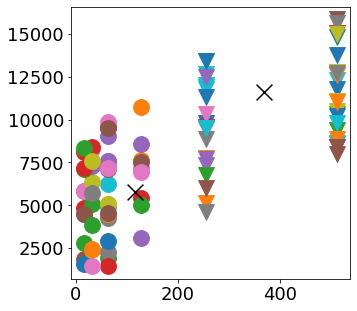

In [71]:
fig=plt.figure(figsize=(5,5))
markers={'Android':'o','iOS':'v'}
for disk,price,os in zip(phone.disk,phone.price,phone.os):
    plt.scatter(disk,price,s=250,marker=markers[os])

plt.scatter(c1[0],c1[1],s=250,marker='x',c='black')
plt.scatter(c2[0],c2[1],s=250,marker='x',c='black')

plt.show()
